<a href="https://colab.research.google.com/github/grvtaun/Machine-Learning/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('Stroke.csv')

In [52]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [53]:
df.shape

(5110, 12)

In [54]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [55]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [56]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [57]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True) 

In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


# Find corelation among the attributes

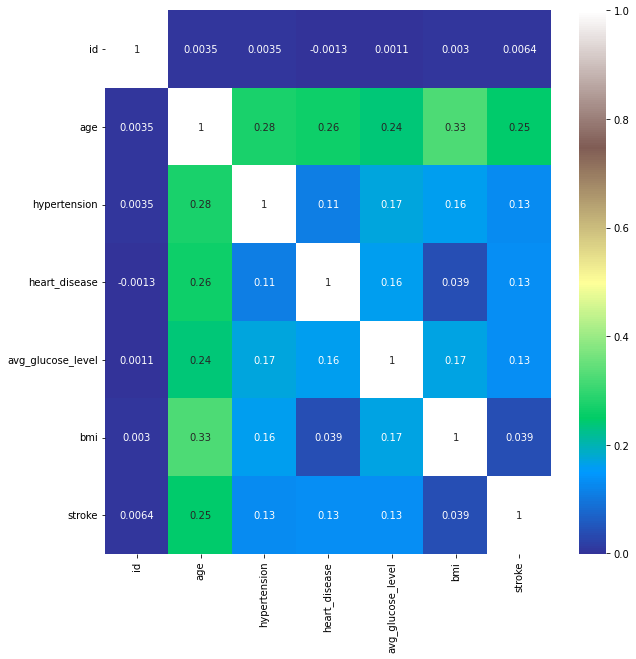

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'terrain')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ef9dcbf50>,
      dtype=object)

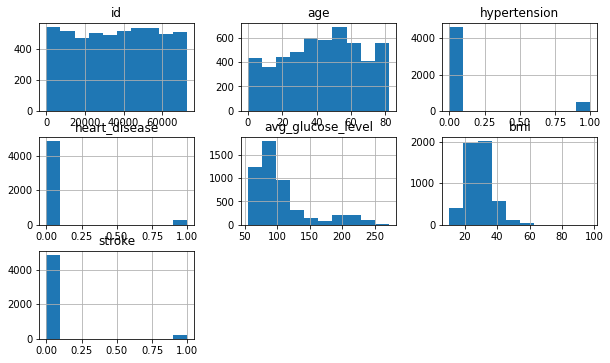

In [60]:
df.hist(figsize=(10,10), layout=(5,3))

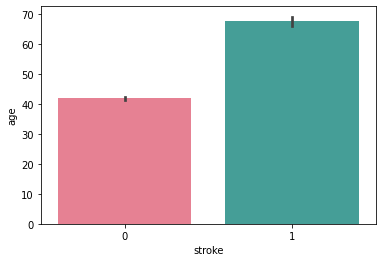

In [61]:
sns.barplot(data=df, y='age',x ='stroke', palette ='husl')

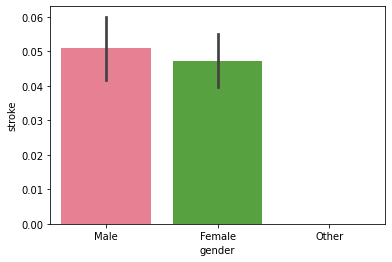

In [62]:
sns.barplot(data=df, y='stroke',x ='gender', palette ='husl')

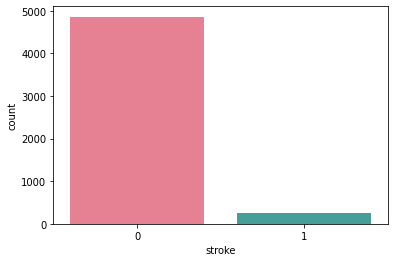

In [63]:
sns.countplot(data=df,x ='stroke', palette ='husl')

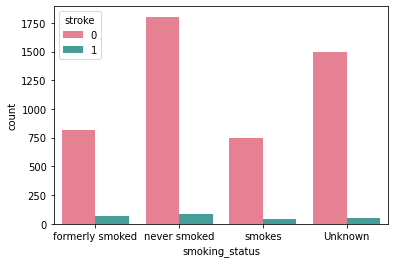

In [64]:
sns.countplot(data=df,x ='smoking_status',hue='stroke', palette ='husl')

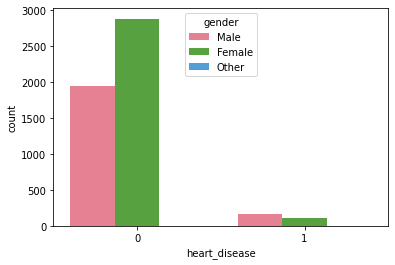

In [65]:
sns.countplot(data=df,x ='heart_disease',hue='gender', palette ='husl')

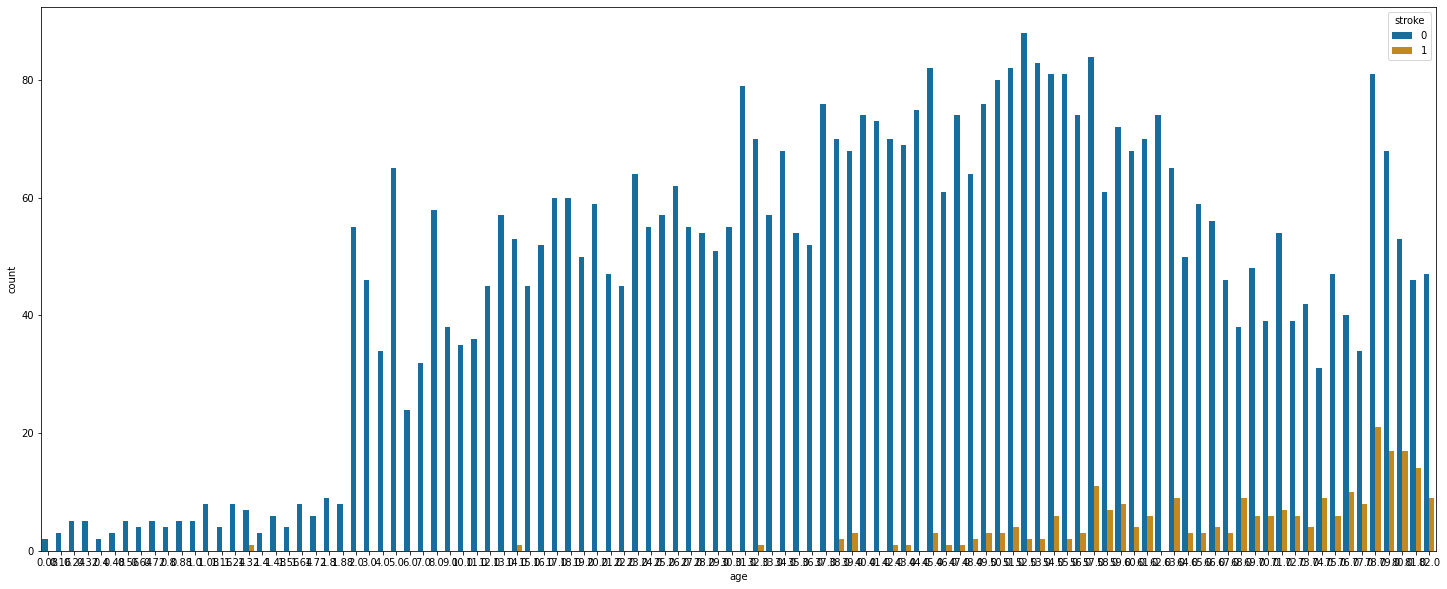

In [66]:
plt.subplots(figsize=(25,10))
sns.countplot(x='age', hue='stroke' , data=df, palette = 'colorblind')


Dropping the not required column


In [67]:
df = df.drop('id' , axis = 1)

Converting Categorical columns
 

In [68]:
df = pd.get_dummies(df,drop_first=True)

In [69]:
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','avg_glucose_level','bmi']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [71]:
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,2.706375,1.001234e+00,1,1,0,1,0,1,0,0,1,1,0,0
1,0.786070,0,0,2.121559,1.384666e-15,1,0,0,1,0,0,1,0,0,0,1,0
2,1.626390,0,1,-0.005028,4.685773e-01,1,1,0,1,0,1,0,0,0,0,1,0
3,0.255342,0,0,1.437358,7.154182e-01,1,0,0,1,0,1,0,0,1,0,0,1
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,0,1,0,0,1,0,0,0,1,0


In [73]:
X= df.drop(['stroke'], axis=1)
y= df['stroke']
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

Sample Size


In [74]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 57232
X_test- 24528
y_train- 3577
y_test- 1533


***Logistic Regression ***


In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm

array([[1462,    0],
       [  71,    0]])

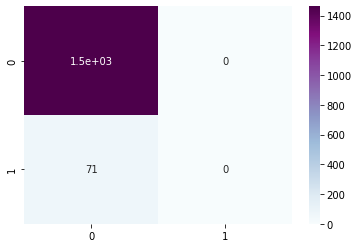

In [77]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9536855838225701

**Decision Tree Classifier**

In [79]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [80]:
cm2

array([[1390,   72],
       [  57,   14]])

In [81]:
accuracy_score(y_test,prediction2)

0.9158512720156555

**KNN Classifier**

In [82]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model3 = KNN.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3= confusion_matrix(y_test, prediction3)
cm3

array([[1452,   10],
       [  70,    1]])

In [83]:
accuracy_score(y_test,prediction3)

0.9478147423352903

**SVM Algoritham**

In [84]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[1462,    0],
       [  71,    0]])

In [85]:
accuracy_score(y_test, prediction4)

0.9536855838225701

In [86]:
print('LR :', accuracy_score(y_test, prediction1))
print('DTA :', accuracy_score(y_test, prediction2))
print('KNN :', accuracy_score(y_test, prediction3))
print('SVM :', accuracy_score(y_test, prediction4))

LR : 0.9536855838225701
DTA : 0.9158512720156555
KNN : 0.9478147423352903
SVM : 0.9536855838225701
